In [274]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
import numpy as np
import seaborn as sns

df = pd.read_csv('https://github.com/MyungKyuYi/AI-class/raw/refs/heads/main/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [275]:
# 결측치 확인
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [276]:
df['Wine'].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [277]:
# 특징 및 레이블 분리
X = df.drop(columns=['Wine'])
y = df['Wine']

In [278]:
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [279]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [280]:
# 학습, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1557)
print("학습 데이터 개수:", len(X_train))
print("테스트 데이터 개수:", len(X_test))

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

학습 데이터 개수: 142
테스트 데이터 개수: 36


In [281]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(142, 13) (36, 13)
(142,) (36,)


In [282]:
# Decision Tree 모델 생성 및 학습
dt_model = DecisionTreeClassifier(random_state=1557)
dt_model.fit(X_train, y_train)

# 예측 및 평가, confusion matrix 출력
dt_pred = dt_model.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, dt_pred)}')
print(confusion_matrix(y_test, dt_pred))

Decision Tree Accuracy: 0.9444444444444444
[[12  1  0]
 [ 1 11  0]
 [ 0  0 11]]


In [283]:
param_grid = {
    'max_depth': [3, 5, 10, None],  # 트리 최대 깊이
    'min_samples_split': [2, 5, 10],  # 최소 샘플 분할 기준
    'min_samples_leaf': [1, 2, 5],  # 리프 노드 최소 샘플 수
    'criterion': ['gini', 'entropy']  # 불순도 계산 방식
}

grid_search = GridSearchCV(dt_model, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("테스트 데이터 정확도:", test_score)

최적의 하이퍼파라미터: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 정확도: 0.9573891625615765
테스트 데이터 정확도: 1.0


In [284]:
best_param = grid_search.best_params_
dt_model = DecisionTreeClassifier(**best_param)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, dt_pred)}')
print(confusion_matrix(y_test, dt_pred))

Decision Tree Accuracy: 0.9722222222222222
[[13  0  0]
 [ 0 12  0]
 [ 0  1 10]]


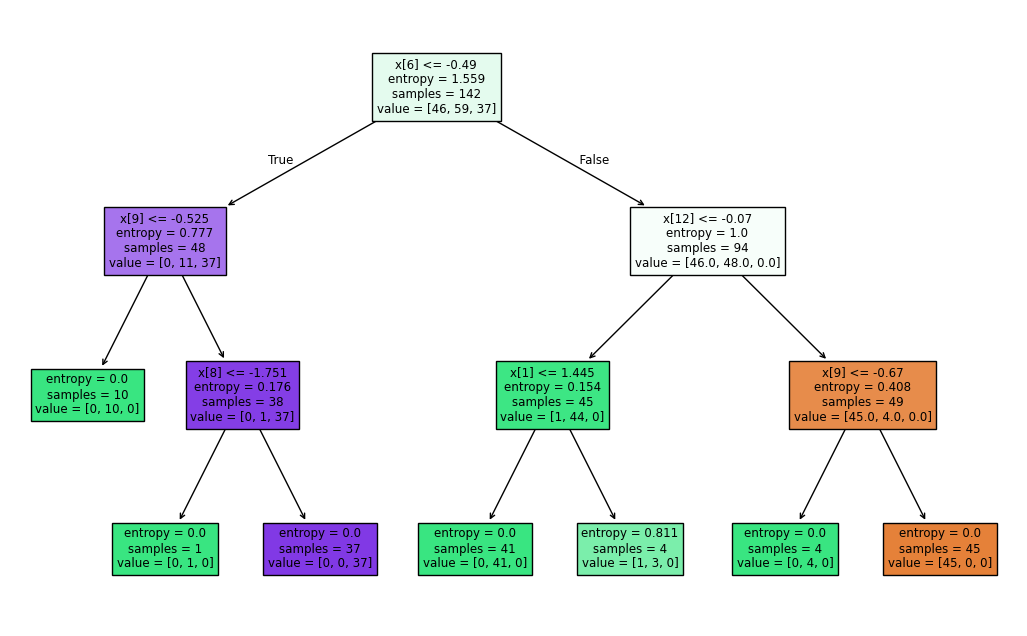

In [285]:
plt.figure(figsize = (13, 8))
plot_tree(dt_model, filled = True)
plt.show()

In [286]:
# Random Forest 모델 생성 및 학습
rf_model = RandomForestClassifier(random_state=1557)
rf_model.fit(X_train, y_train)

# 예측 및 평가, confusion matrix 출력
rf_pred = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}')
print(confusion_matrix(y_test, rf_pred))

Random Forest Accuracy: 1.0
[[13  0  0]
 [ 0 12  0]
 [ 0  0 11]]


In [287]:
# Logistic Regression 모델 생성 및 학습
lr_model =LogisticRegression(max_iter=200, random_state=1557)
lr_model.fit(X_train, y_train)

# 예측 및 평가, confusion matrix 출력
lr_pred = lr_model.predict(X_test)
print(f'Logistic Regression: {accuracy_score(y_test, lr_pred)}')
print(confusion_matrix(y_test, lr_pred))

Logistic Regression: 0.9722222222222222
[[13  0  0]
 [ 0 11  1]
 [ 0  0 11]]


In [288]:
# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 예측 및 평가, confusion matrix 출력
knn_pred = knn.predict(X_test)
print(f'KNN: {accuracy_score(y_test, knn_pred)}')
print(confusion_matrix(y_test, knn_pred))

KNN: 0.9722222222222222
[[13  0  0]
 [ 0 11  1]
 [ 0  0 11]]


In [289]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("테스트 데이터 정확도:", test_score)

최적의 하이퍼파라미터: {'n_neighbors': 11}
최고 정확도: 0.9788177339901478
테스트 데이터 정확도: 1.0


In [290]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
print(f'KNN: {accuracy_score(y_test, knn_pred)}')
print(confusion_matrix(y_test, knn_pred))

KNN: 1.0
[[13  0  0]
 [ 0 12  0]
 [ 0  0 11]]


딥러닝

In [291]:
X = X.values
Y = pd.get_dummies(y).values
Y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print("학습 데이터 개수:", len(X_train))
print("테스트 데이터 개수:", len(X_test))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

학습 데이터 개수: 124
테스트 데이터 개수: 54
(124, 13) (54, 13)
(124, 3) (54, 3)


In [293]:
model = Sequential()

model.add(keras.Input(shape=(13, )))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(Adam(learning_rate = 0.04), 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 16)                224       
                                                                 
 dense_53 (Dense)            (None, 12)                204       
                                                                 
 dense_54 (Dense)            (None, 8)                 104       
                                                                 
 dense_55 (Dense)            (None, 3)                 27        
                                                                 
Total params: 559
Trainable params: 559
Non-trainable params: 0
_________________________________________________________________


In [294]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
7/7 [==============================] - 1s 77ms/step - loss: 57.7306 - accuracy: 0.3232 - val_loss: 5.4284 - val_accuracy: 0.2800
Epoch 2/50
7/7 [==============================] - 0s 13ms/step - loss: 1.8917 - accuracy: 0.4545 - val_loss: 1.2409 - val_accuracy: 0.4800
Epoch 3/50
7/7 [==============================] - 0s 13ms/step - loss: 1.1931 - accuracy: 0.3737 - val_loss: 1.0642 - val_accuracy: 0.4800
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 1.1445 - accuracy: 0.3737 - val_loss: 1.0594 - val_accuracy: 0.4800
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 1.1282 - accuracy: 0.3737 - val_loss: 1.0555 - val_accuracy: 0.4800
Epoch 6/50
7/7 [==============================] - 0s 16ms/step - loss: 1.1084 - accuracy: 0.3737 - val_loss: 1.0621 - val_accuracy: 0.4800
Epoch 7/50
7/7 [==============================] - 0s 16ms/step - loss: 1.0977 - accuracy: 0.3737 - val_loss: 1.0720 - val_accuracy: 0.4800
Epoch 8/50
7/7 [==========

In [295]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

2/2 [==============================] - 0s 0s/step


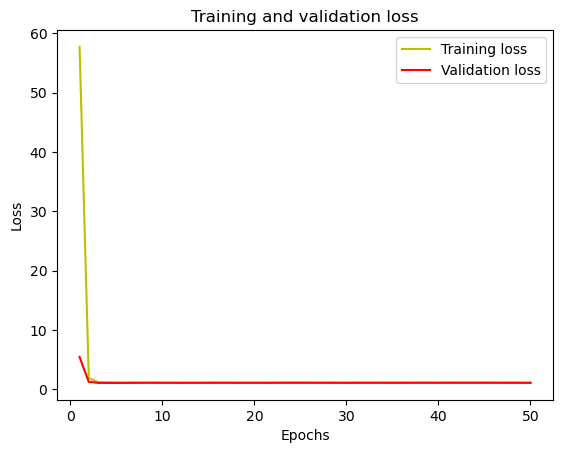

In [296]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

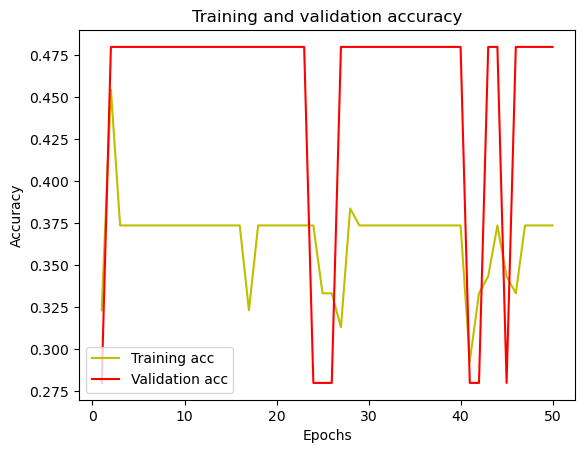

In [297]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [298]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.41      1.00      0.58        22
           2       0.00      0.00      0.00        13

    accuracy                           0.41        54
   macro avg       0.14      0.33      0.19        54
weighted avg       0.17      0.41      0.24        54

[[ 0 19  0]
 [ 0 22  0]
 [ 0 13  0]]


c:\Users\woong\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\woong\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\woong\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)